In [14]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [15]:

# Define the ticker symbol for BTCUSD
ticker_symbol = 'BTC-USD'

day_palette = {
    'Monday': 'green',
    'Tuesday': 'red',
    'Wednesday': 'blue',
    'Thursday': 'purple',
    'Friday': 'pink',
    'Saturday': 'orange',
    'Sunday': 'yellow'
}

year_palette = {
    2019: 'yellow',
    2024: 'red',
    2022: 'green',
    2023: 'blue'
}

In [16]:
btc_data_from_2019_to_2024_part_1_1_d = yf.download(ticker_symbol, start='2024-01-01', end='2024-10-07', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [17]:
btc_data_from_2019_to_2024_part_1_1_d.index.name = btc_data_from_2019_to_2024_part_1_1_d.index.name.lower()
btc_data_from_2019_to_2024_part_1_1_d.columns = btc_data_from_2019_to_2024_part_1_1_d.columns.str.lower()

In [18]:
btc_data_from_2019_to_2024_part_1_1_d['year'] = btc_data_from_2019_to_2024_part_1_1_d.index.year
btc_data_from_2019_to_2024_part_1_1_d['month'] = btc_data_from_2019_to_2024_part_1_1_d.index.month
btc_data_from_2019_to_2024_part_1_1_d['day'] = btc_data_from_2019_to_2024_part_1_1_d.index.day
btc_data_from_2019_to_2024_part_1_1_d['day_name'] = btc_data_from_2019_to_2024_part_1_1_d.index.day_name()

In [19]:
print(dir(btc_data_from_2019_to_2024_part_1_1_d.index))

['T', '__abs__', '__abstractmethods__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__init__', '__init_subclass__', '__invert__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__setitem__', '__sizeof__', '__slots__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '__xor__', '_abc_impl', '_accessors', '_arith_method'

In [20]:
btc_data_from_2019_to_2024_part_1_1_d['max'] = btc_data_from_2019_to_2024_part_1_1_d[['open', 'high', 'low', 'close']].max(axis=1)
btc_data_from_2019_to_2024_part_1_1_d['min'] = btc_data_from_2019_to_2024_part_1_1_d[['open', 'high', 'low', 'close']].min(axis=1)
btc_data_from_2019_to_2024_part_1_1_d['difference'] = btc_data_from_2019_to_2024_part_1_1_d['max'] - btc_data_from_2019_to_2024_part_1_1_d['min']

In [21]:
btc_data_from_2019_to_2024_part_1_1_d

,open,high,low,close,adj close,volume,year,month,day,day_name,max,min,difference
date,,,,,,,,,,,,,
2024-01-01,42280.234375,44175.437500,42214.976562,44167.332031,44167.332031,18426978443,2024,1,1,Monday,44175.437500,42214.976562,1960.460938
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,39335274536,2024,1,2,Tuesday,45899.707031,44176.949219,1722.757812
2024-01-03,44961.601562,45503.242188,40813.535156,42848.175781,42848.175781,46342323118,2024,1,3,Wednesday,45503.242188,40813.535156,4689.707031
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210,2024,1,4,Thursday,44770.023438,42675.175781,2094.847656
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347,2024,1,5,Friday,44353.285156,42784.718750,1568.566406
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-06,53991.347656,57059.917969,53973.273438,56034.316406,56034.316406,49300484106,2024,8,6,Tuesday,57059.917969,53973.273438,3086.644531
2024-08-07,56040.632812,57726.882812,54620.507812,55027.460938,55027.460938,41637562185,2024,8,7,Wednesday,57726.882812,54620.507812,3106.375000
2024-08-08,55030.027344,62673.765625,54766.726562,61710.136719,61710.136719,45298472567,2024,8,8,Thursday,62673.765625,54766.726562,7907.039062


In [27]:
day_month_volume_analysis = btc_data_from_2019_to_2024_part_1_1_d.groupby(['day', 'month']).agg({'volume': 'sum'}).reset_index()

In [28]:
day_month_volume_analysis

,day,month,volume
0,1,1,18426978443
1,1,2,21423953779
2,1,3,40186368423
3,1,4,34873527352
4,1,5,48439780271
...,...,...,...
218,30,7,31380492109
219,31,1,24673628793
220,31,3,20050941373
221,31,5,27387283769


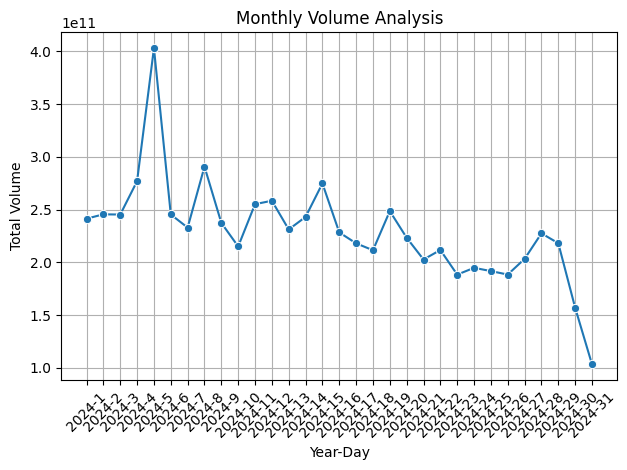

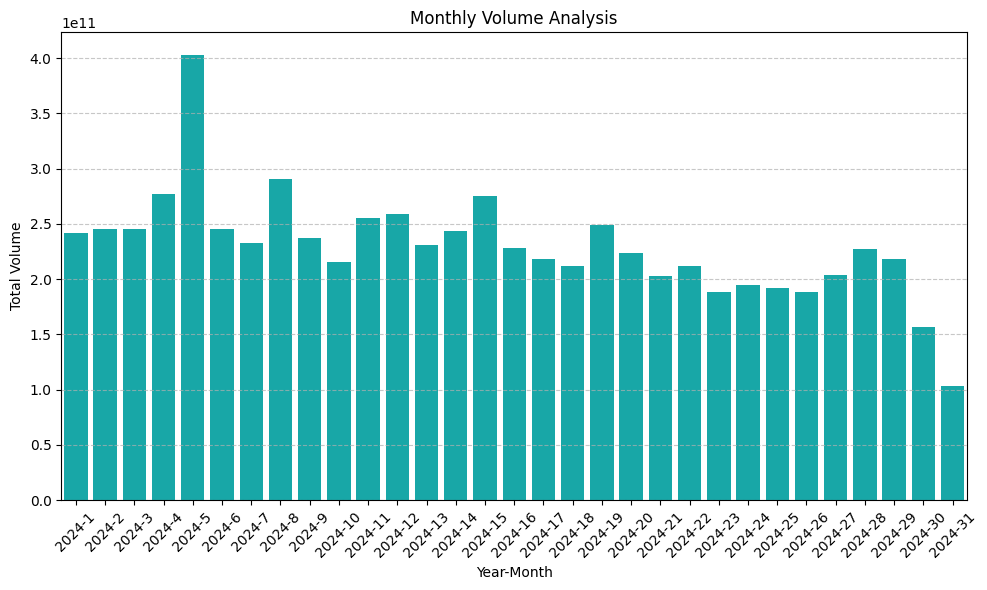

In [24]:
# Create a combined 'Year-Month' column for better x-axis labels
day_year_volume_analysis['year_day'] = day_year_volume_analysis['year'].astype(str) + '-' + day_year_volume_analysis['day'].astype(str)

# Line Plot
sns.lineplot(data=day_year_volume_analysis, x='year_day', y='volume', marker='o')
plt.title('Monthly Volume Analysis')
plt.xlabel('Year-Day')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=day_year_volume_analysis, x='year_day', y='volume', color='c')
plt.title('Monthly Volume Analysis')
plt.xlabel('Year-Month')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
day_year_volume_analysis = btc_data_from_2019_to_2024_part_1_1_d.groupby(['day', 'month']).agg({'volume': 'sum'}).reset_index()